In [84]:
import numpy as np
import pickle
from matplotlib import pyplot as plt

In [85]:
with open('data1.pickle', 'rb') as fh:
    data = pickle.load(fh)

In [86]:
radar_cube_list = np.array(data['radar_cube_list'])
mags_breathing = np.array(data['mags_breathing'])
phases_breathing = np.array(data['phases_breathing'])
maximumpeak = data['max_bin']
subtracted_range_profile_average = np.array(data['bkg_subtracted'])
subtracted_range_profile_average.shape

(150, 1, 256)

In [87]:
radar_cube_list.shape

(150, 3, 4, 256)

In [88]:
maximumpeak

16

In [89]:
fft_mag = np.abs(np.fft.fft(mags_breathing[10:]))
fft_pha = np.abs(np.fft.fft(phases_breathing[10:]))

In [90]:
60*0.45


27.0

Text(0.5, 0, 'Pha FFT')

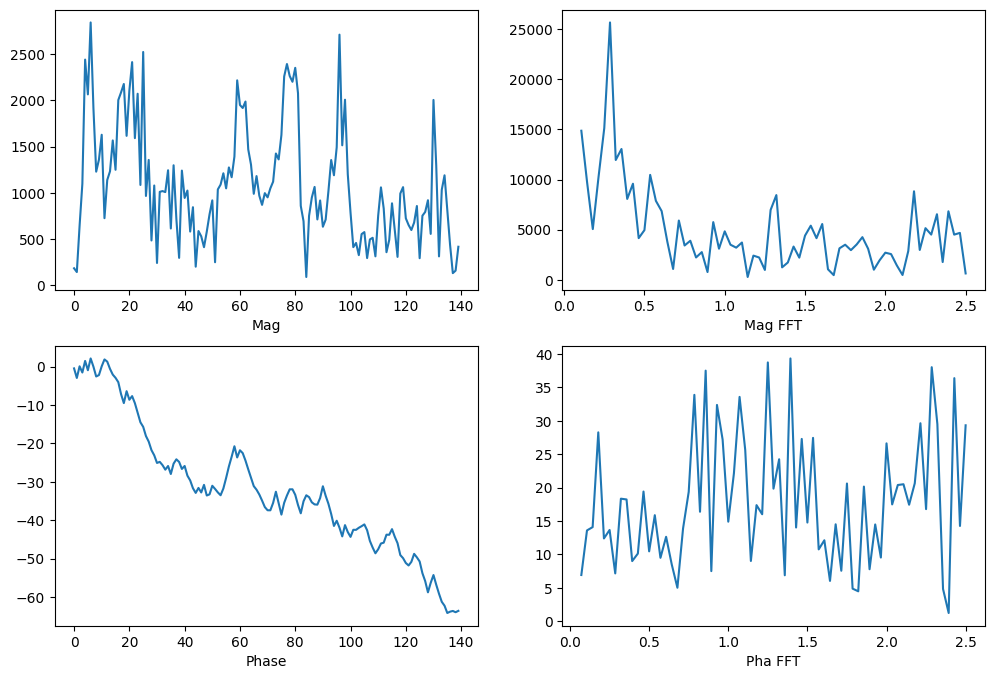

In [92]:
n_frames = 140
plt.figure(figsize=(12,8))
plt.subplot(2,2,1)
plt.plot(mags_breathing[10:]) ## this 10 is because we are finding fft after 10 frames because in first 10 frames subtracted profile is being calculated
plt.xlabel('Mag')
plt.subplot(2,2,3)
plt.plot(np.unwrap(phases_breathing[10:]))
plt.xlabel('Phase')
plt.subplot(2,2,2)
xf = np.fft.rfftfreq(n_frames, 1 / 5)
plt.plot(xf[3:], fft_mag[3:int(n_frames/2 + 1)])
plt.xlabel('Mag FFT')
plt.subplot(2,2,4)
plt.plot(xf[2:], fft_pha[2:int(n_frames/2 + 1)])
plt.xlabel('Pha FFT')


0. Do 60 second measurements. 
1. Understand all the code above and re-implement on your own. 
2. Find out why I am doing [2:]. Why I am doing int(n_frames/2 + 1).
3. DO more measurements (10-20 measurements) at 2ft, 3ft, 4ft upto 5ft. and at different angles e.g., 10 degrees, 20 degrees, 30 degrees. During all these measurements, note the ground truth for breathing rate. Have an algorithm that finds and prints BR from the plot. 
4. See if phase FFT in the new measurements makes more sense (similar to the mag FFT). 